In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
heart = pd.read_csv('heart.csv')

## **DATA EXPLORATION**

In [5]:
heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [6]:
#There are some features which have Object Data Type while remaining features are numerical

In [7]:
heart.describe()
# Checking some key statistical information about numerical features 

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [8]:
# Checking for Missing of Null Values in Data Set

heart.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [9]:
# Checking Unique Values in the Target Class of Our Data which is Heart Disease

heart['HeartDisease'].unique()

array([0, 1], dtype=int64)

In [10]:
heart.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


## **FEATURE ENGINEERING**(Converting Object Type Features into Numeric )

In [11]:
# Now Seperating those features which are categorical and Object type
X_categorical = heart.select_dtypes(include=['object'])

# Now converting object type data into numeric form 
X_categorical=pd.get_dummies(X_categorical,drop_first=True)

# Now Seperating those features which are NUMERICAL
x_numerical = heart.select_dtypes(include=['float64','int64'])

# Now Joining the above data sets
heart1 = X_categorical.join(x_numerical, on=None, how='left', sort=True)


In [12]:
heart1.head()

,Sex_M,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_Normal,RestingECG_ST,ExerciseAngina_Y,ST_Slope_Flat,ST_Slope_Up,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
0,1,1,0,0,1,0,0,0,1,40,140,289,0,172,0.0,0
1,0,0,1,0,1,0,0,1,0,49,160,180,0,156,1.0,1
2,1,1,0,0,0,1,0,0,1,37,130,283,0,98,0.0,0
3,0,0,0,0,1,0,1,1,0,48,138,214,0,108,1.5,1
4,1,0,1,0,1,0,0,0,1,54,150,195,0,122,0.0,0


# **Graphical Exploration of Data**

In [13]:
# Checking for Correlation between features
corr = heart1.corr()

<AxesSubplot:>

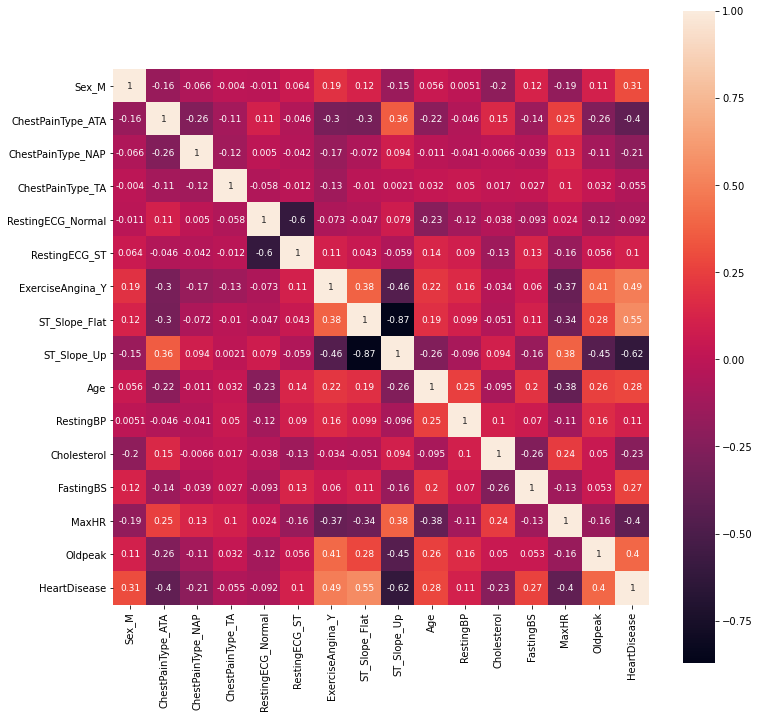

In [14]:
fig, ax = plt.subplots(figsize=(12,12)) 
sns.heatmap(corr,annot=True,square=True,annot_kws={"size": 9},ax=ax)

# From the below Heatmap we can see that heart disease is relatively better correlated with ChestPainType
# Exercise Angina,Old peak and ST_Slope


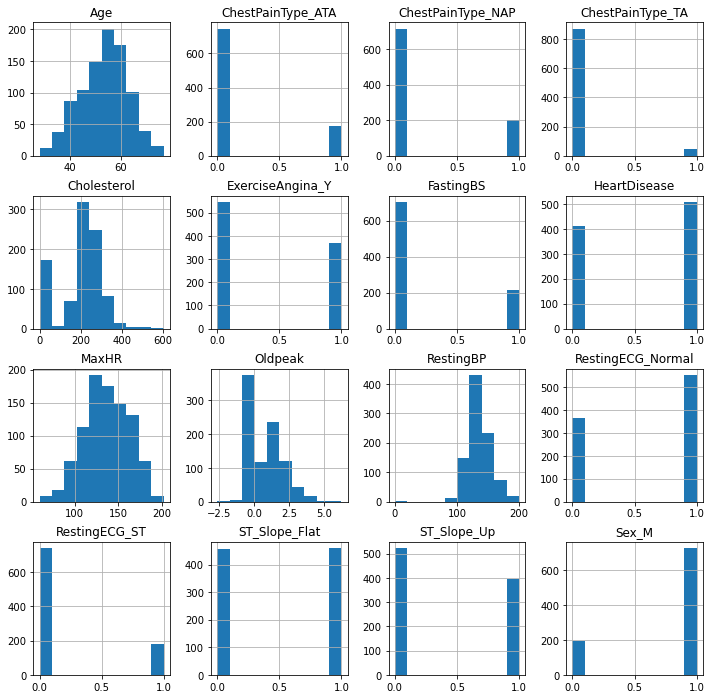

In [15]:
hist = heart1.hist(figsize=(12,12))
# histplot = sns.histplot(heart)

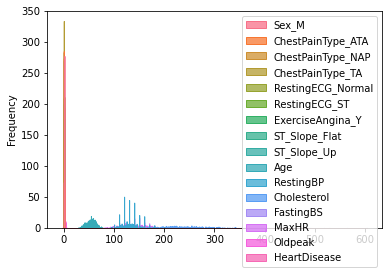

In [16]:
histplot = sns.histplot(heart1,element='step',shrink=5,stat='frequency')

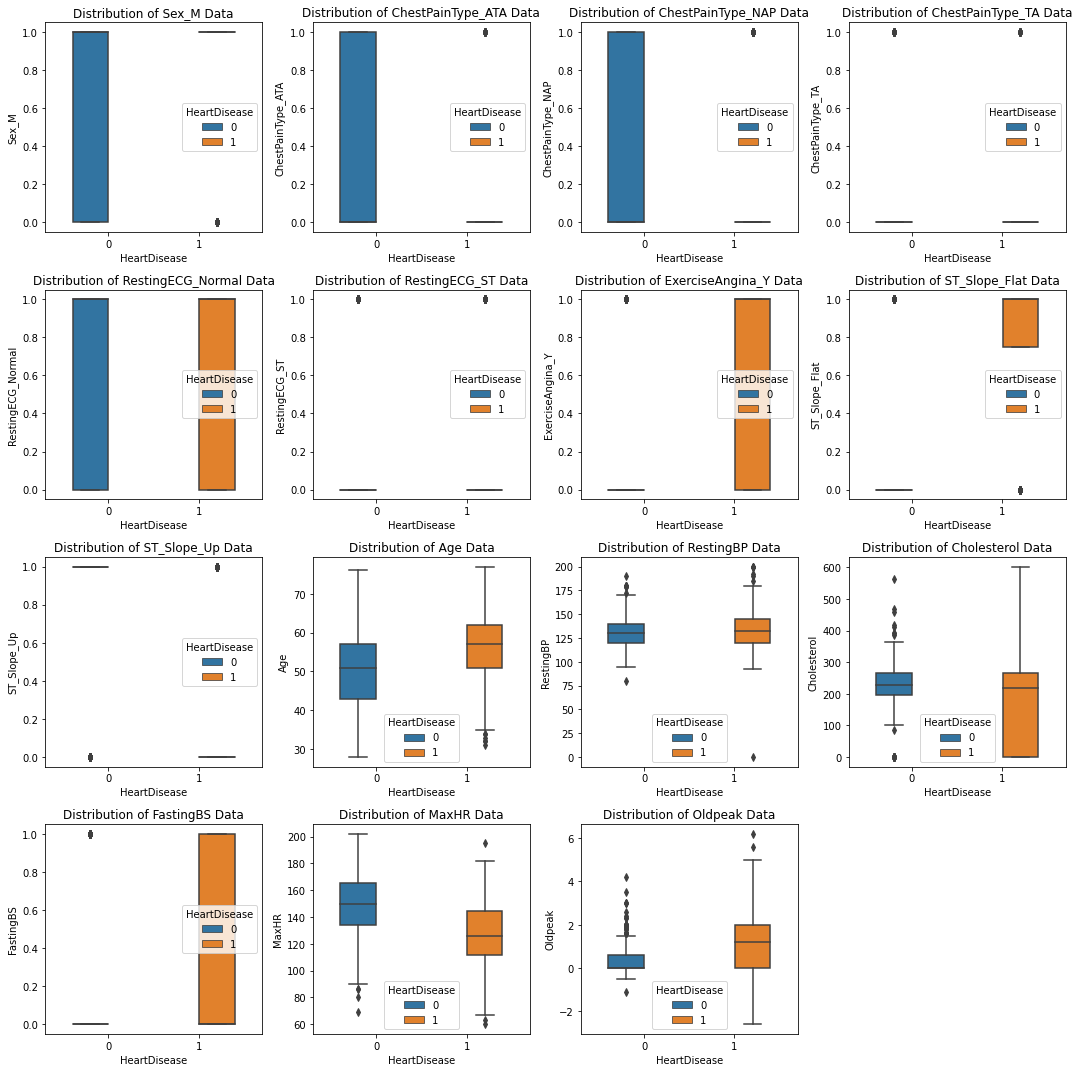

In [17]:
# Now lets look at the outliers in Numerical features in our data set
plt.figure(figsize=(15,15))
i=1
for col in heart1.columns:
    if col!='HeartDisease' and heart1[col].dtype !='object' and col!=['FastingBS','HeartDisease']:
        plt.subplot(4,4,i)
        plt.title(f"Distribution of {col} Data")
        sns.boxplot(x=heart1["HeartDisease"], y=heart1[col],hue=heart1["HeartDisease"], data=pd.melt(heart1))
        plt.tight_layout()
        plt.plot()
        i+=1

        
#looking at the below boxplot the outliers are not significant enough 

# **MACHINE LEARNING**

In [18]:
x = heart1.iloc[: , :-1].values # Seperating the Target Class
y=heart1.iloc[: , -1] # Storing Target Class in Seperate Variable

In [19]:
# First Lets split the data into training and testing data sets

from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = (train_test_split(x,y,test_size=0.2,random_state=42,stratify=y))

In [20]:
X_train.shape

(734, 15)

In [21]:
# X_train[:, 9:]= sc.fit_transform(X_train[:, 9:])
# X_test[:, 9:]= sc.transform(X_test[:, 9:])

## **LAZY PREDICT**(For Selection of ML Models)

In [22]:
#pip install lazypredict

from lazypredict.Supervised import LazyClassifier

clf = LazyClassifier(verbose=4,ignore_warnings=True, custom_metric=None)
models,predictions = clf.fit(X_train, X_test, y_train, y_test)


C:\Users\Muhammad Saad\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:143: FutureWarning: The sklearn.utils.testing module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.utils. Anything that cannot be imported from sklearn.utils is now part of the private API.
  warnings.warn(message, FutureWarning)
 14%|███████████▍                                                                       | 4/29 [00:00<00:01, 17.52it/s]

{'Model': 'AdaBoostClassifier', 'Accuracy': 0.8641304347826086, 'Balanced Accuracy': 0.8642993782879005, 'ROC AUC': 0.8642993782879005, 'F1 Score': 0.8643368681196983, 'Time taken': 0.0807485580444336}
{'Model': 'BaggingClassifier', 'Accuracy': 0.8586956521739131, 'Balanced Accuracy': 0.8570062171209947, 'ROC AUC': 0.8570062171209948, 'F1 Score': 0.8586956521739131, 'Time taken': 0.03124260902404785}
{'Model': 'BernoulliNB', 'Accuracy': 0.8532608695652174, 'Balanced Accuracy': 0.852104256336681, 'ROC AUC': 0.852104256336681, 'F1 Score': 0.8533441071671958, 'Time taken': 0.021898746490478516}
{'Model': 'CalibratedClassifierCV', 'Accuracy': 0.875, 'Balanced Accuracy': 0.8681252989000479, 'ROC AUC': 0.8681252989000479, 'F1 Score': 0.874011812812358, 'Time taken': 0.09280514717102051}
{'Model': 'DecisionTreeClassifier', 'Accuracy': 0.7880434782608695, 'Balanced Accuracy': 0.7813247250119559, 'ROC AUC': 0.781324725011956, 'F1 Score': 0.7868341993461264, 'Time taken': 0.011013507843017578}
{

 48%|███████████████████████████████████████▌                                          | 14/29 [00:00<00:00, 32.16it/s]

{'Model': 'ExtraTreesClassifier', 'Accuracy': 0.8967391304347826, 'Balanced Accuracy': 0.8937111429937828, 'ROC AUC': 0.8937111429937827, 'F1 Score': 0.8965253398145647, 'Time taken': 0.11094880104064941}
{'Model': 'GaussianNB', 'Accuracy': 0.9130434782608695, 'Balanced Accuracy': 0.9131994261119082, 'ROC AUC': 0.9131994261119082, 'F1 Score': 0.9131368348987859, 'Time taken': 0.024829864501953125}
{'Model': 'KNeighborsClassifier', 'Accuracy': 0.8858695652173914, 'Balanced Accuracy': 0.8827116212338594, 'ROC AUC': 0.8827116212338593, 'F1 Score': 0.8856332703213611, 'Time taken': 0.017923355102539062}
{'Model': 'LabelPropagation', 'Accuracy': 0.8641304347826086, 'Balanced Accuracy': 0.8642993782879005, 'ROC AUC': 0.8642993782879005, 'F1 Score': 0.8643368681196983, 'Time taken': 0.02299952507019043}
{'Model': 'LabelSpreading', 'Accuracy': 0.8641304347826086, 'Balanced Accuracy': 0.8642993782879005, 'ROC AUC': 0.8642993782879005, 'F1 Score': 0.8643368681196983, 'Time taken': 0.031244754791

 66%|█████████████████████████████████████████████████████▋                            | 19/29 [00:00<00:00, 37.44it/s]

{'Model': 'NuSVC', 'Accuracy': 0.8858695652173914, 'Balanced Accuracy': 0.8803204208512674, 'ROC AUC': 0.8803204208512673, 'F1 Score': 0.8852184150325294, 'Time taken': 0.02494668960571289}
{'Model': 'PassiveAggressiveClassifier', 'Accuracy': 0.6956521739130435, 'Balanced Accuracy': 0.6920133907221425, 'ROC AUC': 0.6920133907221425, 'F1 Score': 0.6956521739130435, 'Time taken': 0.008959531784057617}
{'Model': 'Perceptron', 'Accuracy': 0.7010869565217391, 'Balanced Accuracy': 0.687350549976088, 'ROC AUC': 0.687350549976088, 'F1 Score': 0.6952995244920711, 'Time taken': 0.010970354080200195}
{'Model': 'QuadraticDiscriminantAnalysis', 'Accuracy': 0.8586956521739131, 'Balanced Accuracy': 0.8534194165471067, 'ROC AUC': 0.8534194165471066, 'F1 Score': 0.8580312917682207, 'Time taken': 0.01064300537109375}
{'Model': 'RandomForestClassifier', 'Accuracy': 0.8967391304347826, 'Balanced Accuracy': 0.8937111429937828, 'ROC AUC': 0.8937111429937827, 'F1 Score': 0.8965253398145647, 'Time taken': 0.1

 97%|███████████████████████████████████████████████████████████████████████████████▏  | 28/29 [00:00<00:00, 34.37it/s]

{'Model': 'RidgeClassifier', 'Accuracy': 0.8913043478260869, 'Balanced Accuracy': 0.8864179818268771, 'ROC AUC': 0.8864179818268771, 'F1 Score': 0.8907933013601699, 'Time taken': 0.024210691452026367}
{'Model': 'RidgeClassifierCV', 'Accuracy': 0.8913043478260869, 'Balanced Accuracy': 0.8864179818268771, 'ROC AUC': 0.8864179818268771, 'F1 Score': 0.8907933013601699, 'Time taken': 0.016273021697998047}
{'Model': 'SGDClassifier', 'Accuracy': 0.8695652173913043, 'Balanced Accuracy': 0.8715925394548063, 'ROC AUC': 0.8715925394548063, 'F1 Score': 0.869890723087654, 'Time taken': 0.011983156204223633}
{'Model': 'SVC', 'Accuracy': 0.9021739130434783, 'Balanced Accuracy': 0.8962219033955046, 'ROC AUC': 0.8962219033955046, 'F1 Score': 0.9015113270650597, 'Time taken': 0.019968271255493164}
{'Model': 'XGBClassifier', 'Accuracy': 0.8586956521739131, 'Balanced Accuracy': 0.8582018173122907, 'ROC AUC': 0.8582018173122907, 'F1 Score': 0.8588473567105271, 'Time taken': 0.061995744705200195}


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.52it/s]

{'Model': 'LGBMClassifier', 'Accuracy': 0.8586956521739131, 'Balanced Accuracy': 0.8582018173122907, 'ROC AUC': 0.8582018173122907, 'F1 Score': 0.8588473567105271, 'Time taken': 0.12204122543334961}


In [23]:
models

,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
GaussianNB,0.91,0.91,0.91,0.91,0.02
SVC,0.90,0.90,0.90,0.90,0.02
ExtraTreesClassifier,0.90,0.89,0.89,0.90,0.11
RandomForestClassifier,0.90,0.89,0.89,0.90,0.14
RidgeClassifierCV,0.89,0.89,0.89,0.89,0.02
RidgeClassifier,0.89,0.89,0.89,0.89,0.02
LinearDiscriminantAnalysis,0.89,0.89,0.89,0.89,0.02
KNeighborsClassifier,0.89,0.88,0.88,0.89,0.02
LogisticRegression,0.89,0.88,0.88,0.89,0.02


In [25]:
from sklearn.model_selection import StratifiedKFold
cv = StratifiedKFold(n_splits=10, random_state=1,shuffle = True)
lst_accu_stratified = []
  
for train_index, test_index in cv.split(x, y):
    x_train_fold, x_test_fold = x[train_index], x[test_index]
    y_train_fold, y_test_fold = y[train_index], y[test_index]
    # RFC.fit(x_train_fold, y_train_fold)
    # lst_accu_stratified.append(RFC.score(x_test_fold, y_test_fold))

In [26]:
clf = LazyClassifier(verbose=4,ignore_warnings=True, custom_metric=None)
models,predictions = clf.fit(x_train_fold, x_test_fold, y_train_fold, y_test_fold)

models

 14%|███████████▍                                                                       | 4/29 [00:00<00:01, 16.16it/s]

{'Model': 'AdaBoostClassifier', 'Accuracy': 0.8681318681318682, 'Balanced Accuracy': 0.8668292682926829, 'ROC AUC': 0.8668292682926828, 'F1 Score': 0.8681318681318682, 'Time taken': 0.09279537200927734}
{'Model': 'BaggingClassifier', 'Accuracy': 0.8461538461538461, 'Balanced Accuracy': 0.8490243902439024, 'ROC AUC': 0.8490243902439024, 'F1 Score': 0.8465265354800238, 'Time taken': 0.021705150604248047}
{'Model': 'BernoulliNB', 'Accuracy': 0.9230769230769231, 'Balanced Accuracy': 0.9212195121951219, 'ROC AUC': 0.921219512195122, 'F1 Score': 0.9229828965802562, 'Time taken': 0.018841266632080078}
{'Model': 'CalibratedClassifierCV', 'Accuracy': 0.9010989010989011, 'Balanced Accuracy': 0.8990243902439025, 'ROC AUC': 0.8990243902439025, 'F1 Score': 0.900978009888901, 'Time taken': 0.1113901138305664}
{'Model': 'DecisionTreeClassifier', 'Accuracy': 0.8461538461538461, 'Balanced Accuracy': 0.8490243902439024, 'ROC AUC': 0.8490243902439024, 'F1 Score': 0.8465265354800238, 'Time taken': 0.01101

 31%|█████████████████████████▊                                                         | 9/29 [00:00<00:00, 23.61it/s]

{'Model': 'DummyClassifier', 'Accuracy': 0.5604395604395604, 'Balanced Accuracy': 0.5517073170731708, 'ROC AUC': 0.5517073170731708, 'F1 Score': 0.5576218653141729, 'Time taken': 0.01092529296875}
{'Model': 'ExtraTreeClassifier', 'Accuracy': 0.8351648351648352, 'Balanced Accuracy': 0.8368292682926829, 'ROC AUC': 0.8368292682926828, 'F1 Score': 0.8355246936205093, 'Time taken': 0.010970592498779297}
{'Model': 'ExtraTreesClassifier', 'Accuracy': 0.9120879120879121, 'Balanced Accuracy': 0.9134146341463415, 'ROC AUC': 0.9134146341463415, 'F1 Score': 0.9122374224415041, 'Time taken': 0.11307382583618164}
{'Model': 'GaussianNB', 'Accuracy': 0.8681318681318682, 'Balanced Accuracy': 0.8690243902439024, 'ROC AUC': 0.8690243902439024, 'F1 Score': 0.8683561336622561, 'Time taken': 0.0203707218170166}
{'Model': 'KNeighborsClassifier', 'Accuracy': 0.9120879120879121, 'Balanced Accuracy': 0.911219512195122, 'ROC AUC': 0.911219512195122, 'F1 Score': 0.9120879120879121, 'Time taken': 0.014959573745727

 66%|█████████████████████████████████████████████████████▋                            | 19/29 [00:00<00:00, 36.70it/s]

{'Model': 'LabelSpreading', 'Accuracy': 0.8241758241758241, 'Balanced Accuracy': 0.8246341463414634, 'ROC AUC': 0.8246341463414633, 'F1 Score': 0.824474844883008, 'Time taken': 0.04204583168029785}
{'Model': 'LinearDiscriminantAnalysis', 'Accuracy': 0.9010989010989011, 'Balanced Accuracy': 0.9034146341463415, 'ROC AUC': 0.9034146341463415, 'F1 Score': 0.9013148161723057, 'Time taken': 0.014983654022216797}
{'Model': 'LinearSVC', 'Accuracy': 0.9010989010989011, 'Balanced Accuracy': 0.901219512195122, 'ROC AUC': 0.901219512195122, 'F1 Score': 0.9011951903518169, 'Time taken': 0.03794407844543457}
{'Model': 'LogisticRegression', 'Accuracy': 0.9010989010989011, 'Balanced Accuracy': 0.901219512195122, 'ROC AUC': 0.901219512195122, 'F1 Score': 0.9011951903518169, 'Time taken': 0.006975412368774414}
{'Model': 'NearestCentroid', 'Accuracy': 0.9340659340659341, 'Balanced Accuracy': 0.9378048780487804, 'ROC AUC': 0.9378048780487804, 'F1 Score': 0.9342256580628673, 'Time taken': 0.015663385391235

 97%|███████████████████████████████████████████████████████████████████████████████▏  | 28/29 [00:00<00:00, 32.78it/s]

{'Model': 'RandomForestClassifier', 'Accuracy': 0.9010989010989011, 'Balanced Accuracy': 0.8990243902439025, 'ROC AUC': 0.8990243902439025, 'F1 Score': 0.900978009888901, 'Time taken': 0.1427757740020752}
{'Model': 'RidgeClassifier', 'Accuracy': 0.9010989010989011, 'Balanced Accuracy': 0.9034146341463415, 'ROC AUC': 0.9034146341463415, 'F1 Score': 0.9013148161723057, 'Time taken': 0.015673160552978516}
{'Model': 'RidgeClassifierCV', 'Accuracy': 0.9010989010989011, 'Balanced Accuracy': 0.9034146341463415, 'ROC AUC': 0.9034146341463415, 'F1 Score': 0.9013148161723057, 'Time taken': 0.018125534057617188}
{'Model': 'SGDClassifier', 'Accuracy': 0.8901098901098901, 'Balanced Accuracy': 0.8934146341463415, 'ROC AUC': 0.8934146341463415, 'F1 Score': 0.8903760967714457, 'Time taken': 0.012008428573608398}
{'Model': 'SVC', 'Accuracy': 0.9010989010989011, 'Balanced Accuracy': 0.8990243902439025, 'ROC AUC': 0.8990243902439025, 'F1 Score': 0.900978009888901, 'Time taken': 0.01971745491027832}
{'Mod

100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.12it/s]

{'Model': 'LGBMClassifier', 'Accuracy': 0.8791208791208791, 'Balanced Accuracy': 0.8834146341463415, 'ROC AUC': 0.8834146341463415, 'F1 Score': 0.8794133875803567, 'Time taken': 0.12632131576538086}


,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
NearestCentroid,0.93,0.94,0.94,0.93,0.02
BernoulliNB,0.92,0.92,0.92,0.92,0.02
NuSVC,0.92,0.92,0.92,0.92,0.02
ExtraTreesClassifier,0.91,0.91,0.91,0.91,0.11
KNeighborsClassifier,0.91,0.91,0.91,0.91,0.01
RidgeClassifierCV,0.90,0.90,0.90,0.90,0.02
RidgeClassifier,0.90,0.90,0.90,0.90,0.02
LinearDiscriminantAnalysis,0.90,0.90,0.90,0.90,0.01
LinearSVC,0.90,0.90,0.90,0.90,0.04


## **MODELS BUILDING**

Based on LazyPredict, we will be developing and fine tuning following 5 Models for Heart Disease Prediction

1) NUSVC
2) Gradient Booting Classifier
3) XG Boost Classifier
4) EXTRATRESSCLASSIFIER
5) RANDOMFORESTCLASSIFIER

In the End Stacking has been performed for best results


**1. NUSVC**

In [105]:
Model_NuSVC = NuSVC()

lst_accu_stratified_NuSVC = []
for train_index, test_index in cv.split(x, y):
    x_train_fold, x_test_fold = x[train_index], x[test_index]
    y_train_fold, y_test_fold = y[train_index], y[test_index]
    Model_NuSVC.fit(x_train_fold, y_train_fold)
    lst_accu_stratified_NuSVC.append(Model_NuSVC.score(x_test_fold, y_test_fold))
  
print('List of possible accuracy:', lst_accu_stratified_NuSVC)
print('\nMaximum Accuracy That can be obtained from this model is:',
      max(lst_accu_stratified_NuSVC)*100, '%')
print('\nMinimum Accuracy:',
      min(lst_accu_stratified_NuSVC)*100, '%')
print('\nOverall Accuracy:',
      mean(lst_accu_stratified_NuSVC)*100, '%')
print('\nStandard Deviation is:', stdev(lst_accu_stratified_NuSVC))

List of possible accuracy: [0.7934782608695652, 0.782608695652174, 0.8478260869565217, 0.8369565217391305, 0.8043478260869565, 0.9239130434782609, 0.8804347826086957, 0.8804347826086957, 0.8461538461538461, 0.9120879120879121]

Maximum Accuracy That can be obtained from this model is: 92.3913043478261 %

Minimum Accuracy: 78.26086956521739 %

Overall Accuracy: 85.08241758241758 %

Standard Deviation is: 0.04850415005397742


In [106]:
Model_NuSVC.fit(X_train,y_train)

print('Model Performance NuSVC ')
print('Accuracy Train: %s' % accuracy_score(Model_NuSVC.predict(X_train),y_train))
print('MCC Train: %s' % matthews_corrcoef(Model_NuSVC.predict(X_train),y_train))
print('F1 Score Train : %s'% f1_score(Model_NuSVC.predict(X_train),y_train))
print()
print('Accuracy Test: %s' % accuracy_score(Model_NuSVC.predict(X_test),y_test))
print('MCC Test: %s' % matthews_corrcoef(Model_NuSVC.predict(X_test),y_test))
print('F1 Score Test : %s'% f1_score(Model_NuSVC.predict(X_test),y_test))
print()
print(classification_report(Model_NuSVC.predict(X_test),y_test))

Model Performance NuSVC 
Accuracy Train: 0.8514986376021798
MCC Train: 0.6994572721327352
F1 Score Train : 0.8706998813760378

Accuracy Test: 0.875
MCC Test: 0.746633218777735
F1 Score Test : 0.8899521531100477

              precision    recall  f1-score   support

           0       0.83      0.88      0.86        77
           1       0.91      0.87      0.89       107

    accuracy                           0.88       184
   macro avg       0.87      0.88      0.87       184
weighted avg       0.88      0.88      0.88       184



**2. GRADIENT BOOSTING CLASSIFIER**

In [108]:
Model_GBC = GradientBoostingClassifier()
Model_GBC.fit(X_train,y_train)

GradientBoostingClassifier()

In [109]:
lst_accu_stratified_GBC = []
for train_index, test_index in cv.split(x, y):
    x_train_fold, x_test_fold = x[train_index], x[test_index]
    y_train_fold, y_test_fold = y[train_index], y[test_index]
    Model_GBC.fit(x_train_fold, y_train_fold)
    lst_accu_stratified_GBC.append(Model_GBC.score(x_test_fold, y_test_fold))
  
print('List of possible accuracy:', lst_accu_stratified_GBC)
print('\nMaximum Accuracy That can be obtained from this model is:',
      max(lst_accu_stratified_GBC)*100, '%')
print('\nMinimum Accuracy:',
      min(lst_accu_stratified_GBC)*100, '%')
print('\nOverall Accuracy:',
      mean(lst_accu_stratified_GBC)*100, '%')
print('\nStandard Deviation is:', stdev(lst_accu_stratified_GBC))

List of possible accuracy: [0.8478260869565217, 0.7717391304347826, 0.9130434782608695, 0.8260869565217391, 0.8586956521739131, 0.9130434782608695, 0.8804347826086957, 0.9239130434782609, 0.8791208791208791, 0.8791208791208791]

Maximum Accuracy That can be obtained from this model is: 92.3913043478261 %

Minimum Accuracy: 77.17391304347827 %

Overall Accuracy: 86.93024366937411 %

Standard Deviation is: 0.046050120626756785


In [110]:
print('Model Performance GRADIENT BOOSTING ')
print('Accuracy Train: %s' % accuracy_score(Model_GBC.predict(X_train),y_train))
print('MCC Train: %s' % matthews_corrcoef(Model_GBC.predict(X_train),y_train))
print('F1 Score Train : %s'% f1_score(Model_GBC.predict(X_train),y_train))
print()
print('Accuracy Test: %s' % accuracy_score(Model_GBC.predict(X_test),y_test))
print('MCC Test: %s' % matthews_corrcoef(Model_GBC.predict(X_test),y_test))
print('F1 Score Test : %s'% f1_score(Model_GBC.predict(X_test),y_test))
print()
print(classification_report(Model_GBC.predict(X_test),y_test))

Model Performance GRADIENT BOOSTING 
Accuracy Train: 0.9373297002724795
MCC Train: 0.873132298894877
F1 Score Train : 0.9436274509803921

Accuracy Test: 0.9565217391304348
MCC Test: 0.9120038259206121
F1 Score Test : 0.9607843137254902

              precision    recall  f1-score   support

           0       0.95      0.95      0.95        82
           1       0.96      0.96      0.96       102

    accuracy                           0.96       184
   macro avg       0.96      0.96      0.96       184
weighted avg       0.96      0.96      0.96       184



**3. XGBOOST**

In [111]:
from xgboost import XGBClassifier
Model_XGB = XGBClassifier()

In [112]:
lst_accu_stratified_XGB = []
for train_index, test_index in cv.split(x, y):
    x_train_fold, x_test_fold = x[train_index], x[test_index]
    y_train_fold, y_test_fold = y[train_index], y[test_index]
    Model_XGB.fit(x_train_fold, y_train_fold)
    lst_accu_stratified_XGB.append(Model_XGB.score(x_test_fold, y_test_fold))
  
print('List of possible accuracy:', lst_accu_stratified_XGB)
print('\nMaximum Accuracy That can be obtained from this model is:',
      max(lst_accu_stratified_XGB)*100, '%')
print('\nMinimum Accuracy:',
      min(lst_accu_stratified_XGB)*100, '%')
print('\nOverall Accuracy:',
      mean(lst_accu_stratified_XGB)*100, '%')
print('\nStandard Deviation is:', stdev(lst_accu_stratified_XGB))

List of possible accuracy: [0.8369565217391305, 0.782608695652174, 0.9021739130434783, 0.8369565217391305, 0.8804347826086957, 0.9239130434782609, 0.8695652173913043, 0.8804347826086957, 0.8021978021978022, 0.8791208791208791]

Maximum Accuracy That can be obtained from this model is: 92.3913043478261 %

Minimum Accuracy: 78.26086956521739 %

Overall Accuracy: 85.94362159579552 %

Standard Deviation is: 0.04415265370955174


In [113]:
print('Model Performance XGBOOST ')
print('Accuracy Train: %s' % accuracy_score(Model_XGB.predict(X_train),y_train))
print('MCC Train: %s' % matthews_corrcoef(Model_XGB.predict(X_train),y_train))
print('F1 Score Train : %s'% f1_score(Model_XGB.predict(X_train),y_train))
print()
print('Accuracy Test: %s' % accuracy_score(Model_XGB.predict(X_test),y_test))
print('MCC Test: %s' % matthews_corrcoef(Model_XGB.predict(X_test),y_test))
print('F1 Score Test : %s'% f1_score(Model_XGB.predict(X_test),y_test))
print()
print(classification_report(Model_XGB.predict(X_test),y_test))

Model Performance XGBOOST 
Accuracy Train: 0.9877384196185286
MCC Train: 0.9752077070247509
F1 Score Train : 0.9889025893958077

Accuracy Test: 0.9891304347826086
MCC Test: 0.978289060789934
F1 Score Test : 0.99009900990099

              precision    recall  f1-score   support

           0       1.00      0.98      0.99        84
           1       0.98      1.00      0.99       100

    accuracy                           0.99       184
   macro avg       0.99      0.99      0.99       184
weighted avg       0.99      0.99      0.99       184



**4. EXTRATRESSCLASSIFIER**

In [125]:
from sklearn.ensemble import ExtraTreesClassifier,RandomForestClassifier,StackingClassifier,GradientBoostingClassifier
Model_ETREE = ExtraTreesClassifier()

In [126]:
lst_accu_stratified_ETREE = []
for train_index, test_index in cv.split(x, y):
    x_train_fold, x_test_fold = x[train_index], x[test_index]
    y_train_fold, y_test_fold = y[train_index], y[test_index]
    Model_ETREE.fit(x_train_fold, y_train_fold)
    lst_accu_stratified_ETREE.append(Model_ETREE.score(x_test_fold, y_test_fold))
  
print('List of possible accuracy:', lst_accu_stratified_ETREE)
print('\nMaximum Accuracy That can be obtained from this model is:',
      max(lst_accu_stratified_ETREE)*100, '%')
print('\nMinimum Accuracy:',
      min(lst_accu_stratified_ETREE)*100, '%')
print('\nOverall Accuracy:',
      mean(lst_accu_stratified_ETREE)*100, '%')
print('\nStandard Deviation is:', stdev(lst_accu_stratified_ETREE))

List of possible accuracy: [0.8586956521739131, 0.7934782608695652, 0.8913043478260869, 0.8369565217391305, 0.8478260869565217, 0.9565217391304348, 0.8804347826086957, 0.8913043478260869, 0.8571428571428571, 0.8901098901098901]

Maximum Accuracy That can be obtained from this model is: 95.65217391304348 %

Minimum Accuracy: 79.34782608695652 %

Overall Accuracy: 87.03774486383182 %

Standard Deviation is: 0.04299593565459474


In [127]:
Model_ETREE.fit(X_train,y_train)

ExtraTreesClassifier()

In [128]:
print('Model Performance EXTRA TRESS CLASSIFIER')
print('Accuracy Train: %s' % accuracy_score(Model_ETREE.predict(X_train),y_train))
print('MCC Train: %s' % matthews_corrcoef(Model_ETREE.predict(X_train),y_train))
print('F1 Score Train : %s'% f1_score(Model_ETREE.predict(X_train),y_train))
print()
print('Accuracy Test: %s' % accuracy_score(Model_ETREE.predict(X_test),y_test))
print('MCC Test: %s' % matthews_corrcoef(Model_ETREE.predict(X_test),y_test))
print('F1 Score Test : %s'% f1_score(Model_ETREE.predict(X_test),y_test))
print()
print(classification_report(Model_ETREE.predict(X_test),y_test))

Model Performance EXTRA TRESS CLASSIFIER
Accuracy Train: 1.0
MCC Train: 1.0
F1 Score Train : 1.0

Accuracy Test: 0.8804347826086957
MCC Test: 0.7579384823238913
F1 Score Test : 0.8952380952380952

              precision    recall  f1-score   support

           0       0.83      0.89      0.86        76
           1       0.92      0.87      0.90       108

    accuracy                           0.88       184
   macro avg       0.88      0.88      0.88       184
weighted avg       0.88      0.88      0.88       184



**5. RANDOMFORESTCLASSIFIER**

In [129]:
Model_RFC = RandomForestClassifier()

In [130]:
lst_accu_stratified_RFC = []
for train_index, test_index in cv.split(x, y):
    x_train_fold, x_test_fold = x[train_index], x[test_index]
    y_train_fold, y_test_fold = y[train_index], y[test_index]
    Model_RFC.fit(x_train_fold, y_train_fold)
    lst_accu_stratified_RFC.append(Model_RFC.score(x_test_fold, y_test_fold))
  
print('List of possible accuracy:', lst_accu_stratified_RFC)
print('\nMaximum Accuracy That can be obtained from this model is:',
      max(lst_accu_stratified_RFC)*100, '%')
print('\nMinimum Accuracy:',
      min(lst_accu_stratified_RFC)*100, '%')
print('\nOverall Accuracy:',
      mean(lst_accu_stratified_RFC)*100, '%')
print('\nStandard Deviation is:', stdev(lst_accu_stratified_RFC))

List of possible accuracy: [0.8695652173913043, 0.782608695652174, 0.8913043478260869, 0.8260869565217391, 0.8369565217391305, 0.9239130434782609, 0.8913043478260869, 0.8913043478260869, 0.8571428571428571, 0.8901098901098901]

Maximum Accuracy That can be obtained from this model is: 92.3913043478261 %

Minimum Accuracy: 78.26086956521739 %

Overall Accuracy: 86.60296225513616 %

Standard Deviation is: 0.04128218980039049


In [131]:
Model_RFC.fit(X_train,y_train)

RandomForestClassifier()

In [132]:
print('Model Performance RANDOM FORREST ')
print('Accuracy Train: %s' % accuracy_score(Model_RFC.predict(X_train),y_train))
print('MCC Train: %s' % matthews_corrcoef(Model_RFC.predict(X_train),y_train))
print('F1 Score Train : %s'% f1_score(Model_RFC.predict(X_train),y_train))
print()
print('Accuracy Test: %s' % accuracy_score(Model_RFC.predict(X_test),y_test))
print('MCC Test: %s' % matthews_corrcoef(Model_RFC.predict(X_test),y_test))
print('F1 Score Test : %s'% f1_score(Model_RFC.predict(X_test),y_test))
print()
print(classification_report(Model_RFC.predict(X_test),y_test))

Model Performance RANDOM FORREST 
Accuracy Train: 1.0
MCC Train: 1.0
F1 Score Train : 1.0

Accuracy Test: 0.8695652173913043
MCC Test: 0.7360114777618364
F1 Score Test : 0.8823529411764706

              precision    recall  f1-score   support

           0       0.85      0.85      0.85        82
           1       0.88      0.88      0.88       102

    accuracy                           0.87       184
   macro avg       0.87      0.87      0.87       184
weighted avg       0.87      0.87      0.87       184



## **STACKING**

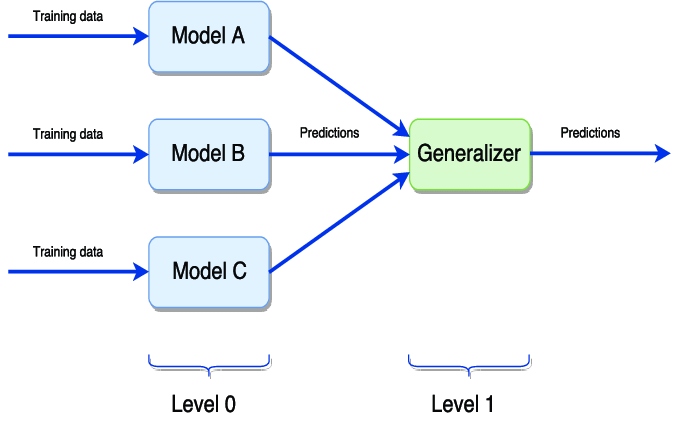

It’s an ensemble of several classifiers, think of it like a team of judges helping to decide together. And yes it uses the predictions from individual classifiers to make a final single prediction

In [117]:
from sklearn.linear_model import LogisticRegression,LogisticRegressionCV
estimator = [
            
            ('ExtraTreesClassifier',Model_ETREE),
            ('RandomForestClassifier',Model_RFC),
            ('NuSVC',Model_NuSVC),
            ('Gradient Booting Classifier',Model_GBC),
            ('XG Boost Classifier',Model_XGB)
]

stack_model = StackingClassifier(estimators=estimator,final_estimator=LogisticRegression())

In [118]:
lst_accu_stratified_Stack = []
for train_index, test_index in cv.split(x, y):
    x_train_fold, x_test_fold = x[train_index], x[test_index]
    y_train_fold, y_test_fold = y[train_index], y[test_index]
    stack_model.fit(x_train_fold, y_train_fold)
    lst_accu_stratified_Stack.append(stack_model.score(x_test_fold, y_test_fold))
  
print('List of possible accuracy:', lst_accu_stratified_Stack)
print('\nMaximum Accuracy That can be obtained from this model is:',
      max(lst_accu_stratified_Stack)*100, '%')
print('\nMinimum Accuracy:',
      min(lst_accu_stratified_Stack)*100, '%')
print('\nOverall Accuracy:',
      mean(lst_accu_stratified_Stack)*100, '%')
print('\nStandard Deviation is:', stdev(lst_accu_stratified_Stack))

List of possible accuracy: [0.8695652173913043, 0.782608695652174, 0.9021739130434783, 0.8478260869565217, 0.8586956521739131, 0.9347826086956522, 0.9130434782608695, 0.8804347826086957, 0.8791208791208791, 0.9010989010989011]

Maximum Accuracy That can be obtained from this model is: 93.47826086956522 %

Minimum Accuracy: 78.26086956521739 %

Overall Accuracy: 87.69350215002389 %

Standard Deviation is: 0.04218986113484984


In [119]:
lst_accu_stratified_StackTrain = []
for train_index, test_index in cv.split(x, y):
    x_train_fold, x_test_fold = x[train_index], x[test_index]
    y_train_fold, y_test_fold = y[train_index], y[test_index]
    stack_model.fit(x_train_fold, y_train_fold)
    lst_accu_stratified_StackTrain.append(stack_model.score(x_train_fold, y_train_fold))
  
print('List of possible accuracy:', lst_accu_stratified_StackTrain)
print('\nMaximum Accuracy That can be obtained from this model is:',
      max(lst_accu_stratified_StackTrain)*100, '%')
print('\nMinimum Accuracy:',
      min(lst_accu_stratified_StackTrain)*100, '%')
print('\nOverall Accuracy:',
      mean(lst_accu_stratified_StackTrain)*100, '%')
print('\nStandard Deviation is:', stdev(lst_accu_stratified_StackTrain))

List of possible accuracy: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]

Maximum Accuracy That can be obtained from this model is: 100.0 %

Minimum Accuracy: 100.0 %

Overall Accuracy: 100.0 %

Standard Deviation is: 0.0


In [135]:
#stack_model.fit(x_train_fold,y_train_fold)

In [136]:
#print(classification_report(stack_model.predict(x_test_fold),y_test_fold))

In [120]:
stack_model.fit(X_train,y_train)

StackingClassifier(estimators=[('ExtraTreesClassifier', ExtraTreesClassifier()),
                               ('RandomForestClassifier',
                                RandomForestClassifier()),
                               ('NuSVC', NuSVC()),
                               ('Gradient Booting Classifier',
                                GradientBoostingClassifier()),
                               ('XG Boost Classifier',
                                XGBClassifier(base_score=0.5, booster='gbtree',
                                              colsample_bylevel=1,
                                              colsample_bynode=1,
                                              colsample_bytree=1, gamma=0,
                                              gpu_id=-1...
                                              interaction_constraints='',
                                              learning_rate=0.300000012,
                                              max_delta_step=0, max_depth=6,

In [121]:
print('Model Performance STACKING MODEL ')
print('Accuracy Train: %s' % accuracy_score(stack_model.predict(X_train),y_train))
print('MCC Train: %s' % matthews_corrcoef(stack_model.predict(X_train),y_train))
print('MCC Train fold: %s' % matthews_corrcoef(stack_model.predict(x_train_fold),y_train_fold))
print('F1 Score Train : %s'% f1_score(stack_model.predict(X_train),y_train))
print()
print('Accuracy Test: %s' % accuracy_score(stack_model.predict(X_test),y_test))
print('MCC Test: %s' % matthews_corrcoef(stack_model.predict(X_test),y_test))
print('MCC Test fold: %s' % matthews_corrcoef(stack_model.predict(x_test_fold),y_test_fold))
print('F1 Score Test : %s'% f1_score(stack_model.predict(X_test),y_test))
print()
print(classification_report(stack_model.predict(X_test),y_test))

Model Performance STACKING MODEL 
Accuracy Train: 0.9959128065395095
MCC Train: 0.9917589340613957
MCC Train fold: 0.943706492883453
F1 Score Train : 0.996319018404908

Accuracy Test: 0.8913043478260869
MCC Test: 0.7800095648015304
MCC Test fold: 1.0
F1 Score Test : 0.9019607843137255

              precision    recall  f1-score   support

           0       0.88      0.88      0.88        82
           1       0.90      0.90      0.90       102

    accuracy                           0.89       184
   macro avg       0.89      0.89      0.89       184
weighted avg       0.89      0.89      0.89       184



**GRID SEARCH**

In [122]:
parameters = {
"penalty" : ['l1', 'l2'],
"loss" : ['hinge', 'squared_hinge'],
"multi_class" : ['ovr', 'crammer_singer'],
#"class_weightdict" :['balanced'],
"C" : [0.1, 1, 10, 100, 1000],
#"kernel" : ['rbf','linear'],
#"gamma" : [ 0.1, 0.01, 0.001, 0.0001]
}

In [133]:
from sklearn.model_selection import GridSearchCV
Search = GridSearchCV(Model_SVC,parameters,cv=cv)
#Search.fit(x,y)

In [75]:
# print('Best Score: %s' % Search.best_score_)
# print('Best Hyperparameters: %s' % Search.best_params_)

In [135]:
ETREE = np.array(lst_accu_stratified_ETREE).reshape(10,1)
GBC = np.array(lst_accu_stratified_GBC).reshape(10,1)
NuSVC = np.array(lst_accu_stratified_NuSVC).reshape(10,1)
Stack = np.array(lst_accu_stratified_Stack).reshape(10,1)
XGB = np.array(lst_accu_stratified_XGB).reshape(10,1)
RFC = np.array(lst_accu_stratified_RFC).reshape(10,1)


In [141]:
Total_Results = np.concatenate((Stack,GNB,GBC,NuSVC,XGB,RFC), axis=1)

In [138]:
Total_Results = pd.DataFrame(Total_Results,columns=['Stack','GNB','GBC','NuSVC','XGB','RFC'])

## **RESULTS**

In [140]:
Total_Results

,Stack,GNB,GBC,NuSVC,XGB,RFC
0,0.87,0.79,0.85,0.79,0.84,0.87
1,0.78,0.79,0.77,0.78,0.78,0.78
2,0.90,0.89,0.91,0.85,0.90,0.89
3,0.85,0.84,0.83,0.84,0.84,0.83
4,0.86,0.85,0.86,0.80,0.88,0.84
5,0.93,0.92,0.91,0.92,0.92,0.92
6,0.91,0.88,0.88,0.88,0.87,0.89
7,0.88,0.90,0.92,0.88,0.88,0.89
8,0.88,0.87,0.88,0.85,0.80,0.86
9,0.90,0.87,0.88,0.91,0.88,0.89
